## Spring 2024 - CIS189 Module \#8 (2023-03-06)
---

**This Evening's Agenda**:
- Prior module grade distributions
- https://www.youtube.com/watch?v=HKTyOUx9Wf4
- Walkthrough Module 8
- In-class coding


<br>


## Performance of sets/dicts

Dicts and sets use a hash table to store key-value pairs, where each key is hashed to a unique value. This allows for constant-time average case lookup, O(1), regardless of the size of the dictionary. On the other hand, lists require sequential search, resulting in linear time complexity, O(n), where 'n' is the number of elements in the list.

More information on hash tables: 
- https://www.hackerearth.com/practice/data-structures/hash-tables/basics-of-hash-tables/tutorial/

#### List vs. Dict element lookup runtime comparison

In [25]:

import random
import timeit


n_elements = [1, 10, 100, 1000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 25000000, 50000000]

results = []

for n in n_elements:

    l = random.sample(range(1_000_000_000), n)
    search_val = l[-1]
    random.shuffle(l)

    d = {kk:0 for kk in l}

    # Measure list lookup time.
    t1 = timeit.timeit(lambda: search_val in l, number=1)

    # Measure dict lookup time.
    t2 = timeit.timeit(lambda: search_val in d, number=1)

    results.append((n, t1, t2))

    print(f"{n:,} elements: list={t1:.8f} secs., dict={t2:.8f} secs.") 

results


1 elements: list=0.00000240 secs., dict=0.00000150 secs.
10 elements: list=0.00000140 secs., dict=0.00000080 secs.
100 elements: list=0.00000070 secs., dict=0.00000060 secs.
1,000 elements: list=0.00000180 secs., dict=0.00000060 secs.
10,000 elements: list=0.00014570 secs., dict=0.00000090 secs.
50,000 elements: list=0.00110040 secs., dict=0.00000110 secs.
100,000 elements: list=0.01380600 secs., dict=0.00000250 secs.
500,000 elements: list=0.00844420 secs., dict=0.00000180 secs.
1,000,000 elements: list=0.02063580 secs., dict=0.00000220 secs.
5,000,000 elements: list=0.19842650 secs., dict=0.00000250 secs.
10,000,000 elements: list=0.49230760 secs., dict=0.00000260 secs.
25,000,000 elements: list=0.73031380 secs., dict=0.00000240 secs.
50,000,000 elements: list=3.94727270 secs., dict=0.00000250 secs.


[(1, 2.4000000848900527e-06, 1.4999998256826075e-06),
 (10, 1.3999999737279722e-06, 8.000001798791345e-07),
 (100, 7.000001005508238e-07, 6.000000212225132e-07),
 (1000, 1.8000000636675395e-06, 6.000000212225132e-07),
 (10000, 0.00014570000007552153, 9.000000318337698e-07),
 (50000, 0.0011004000000411907, 1.100000190490391e-06),
 (100000, 0.013805999999931373, 2.499999936844688e-06),
 (500000, 0.008444199999985358, 1.8000000636675395e-06),
 (1000000, 0.020635800000036397, 2.2000001536071068e-06),
 (5000000, 0.19842650000009598, 2.499999936844688e-06),
 (10000000, 0.49230760000000373, 2.6000000161729986e-06),
 (25000000, 0.7303137999999763, 2.4000000848900527e-06),
 (50000000, 3.9472727000002124, 2.499999936844688e-06)]

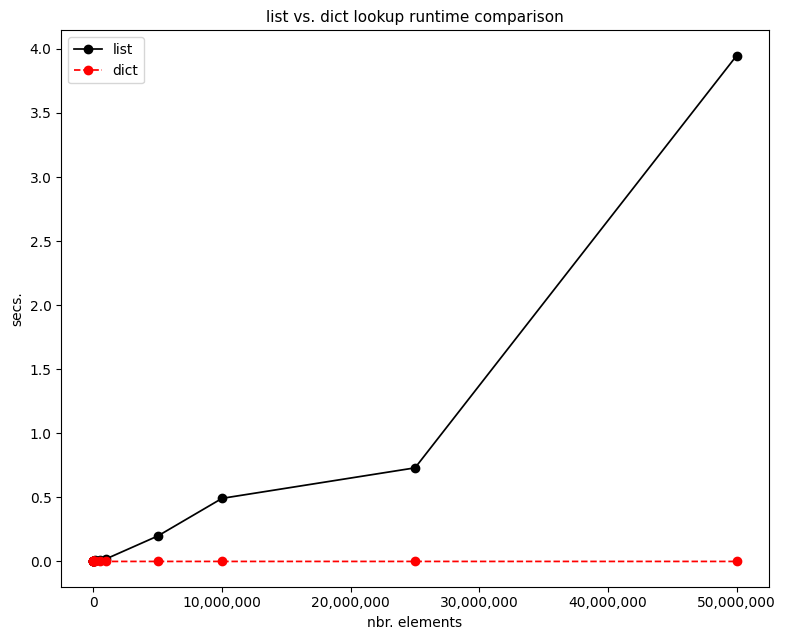

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt

xx, yy1, yy2 = zip(*results)

fig, ax = plt.subplots(1, 1, figsize=(8, 6.5), tight_layout=True)
ax.set_title("list vs. dict lookup runtime comparison", fontsize=11)
# ax.set_xticks(xx)
# ax.set_xticklabels(xx, fontsize=9)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(xx, yy1, color="black", marker="o", linewidth=1.25, label="list")
ax.plot(xx, yy2, color="red", marker="o", linewidth=1.25, linestyle="--", label="dict")
ax.set_xlabel("nbr. elements")
ax.set_ylabel("secs.")

ax.legend(fontsize="medium", loc="upper left")
# ax.set_xscale('log')
plt.show()


## Sets

In Python, sets are unordered collections of unique elements, defined using curly braces `{}` or the `set()` function. They are mutable, allowing for the addition and removal of elements. However, elements within a set must be immutable, such as numbers, strings, or tuples. 

In [ ]:

# Create a set using `set`. Takes an iterable as an argument (list, tuple, etc.).
s1 = set([1, 3, 5, 7, 9])

# Create a set using curly brackets.
s2 = {1, 3, 5, 7, 9}

# Verify s1 and s2 are equal.
assert s1 == s2


Sets are unordered, so it is not possible to access elements by index as with lists and tuples. New elements can be added using `add`. Elements can be removed using `remove`:

In [ ]:

# Adding elements to a set.
s1.add(11)


# Removing elements from a set.
s1.remove(5)


print(f"s1: {s1}")


### Set operations

Sets support mathematical set operations such as union, intersection, difference, and symmetric difference, making them ideal for tasks like finding common elements between collections or removing duplicates from lists efficiently.

- `union`: Find all elements that are in either set.
- `intersection`: Find the elements that are common to both sets.
- `difference`: Find elements that are in the first set but not the second.
- `symmetric_difference`: Find all elements that are in exactly one of the sets.

<br>


![](https://www.learnbyexample.org/wp-content/uploads/python/Python-Set-Operatioons.png)


In [ ]:

s1 = {1, 2, 3, 4, 5}
s2 = {3, 4, 5, 6, 7}


# Set operations for s1 and s2.
inter = s1.intersection(s2)         # Same as s2.intersection(s1)
union = s1.union(s2)                # Same as s1.intersection(s2)
diff1 = s1.difference(s2)           # Not symmetric.
diff2 = s2.difference(s1)           # Not symmetric.
diff3 = s1.symmetric_difference(s2) # Same as s2.symmetric_difference(s1)


print(f"s1                          : {s1}")
print(f"s2                          : {s2}")
print(f"s1.intersection(s2)         : {inter}")
print(f"s1.union(s2)                : {union}")
print(f"s1.difference(s2)           : {diff1}")
print(f"s2.difference(s1)           : {diff2}")
print(f"s1.symmetric_difference(s2) : {diff3}")


#### Sets Checkpoint:

Follow the instructions in the code below.

In [ ]:

# Create a set consisting of the colors of the rainbow. (ROYGBIV).
s1 = {}

# Create a set consisting of the colors of the Iowa state flag 
# (red, white,  blue) plus orange for the eagle's beak.
s2 = {}


# Determine the union of s1 and s2. 



# Determine the intersection of s1 and s2. 



# Determine the symmetric difference between s1 and s2. 



# Convert the union of s1 and s2 to a list. Sort the values alphabetically. 



We can pass a non-nested list of immutable types to `set` to get the unique elements from the list. 

In [ ]:

all_colors = ["red", "blue", "red", "blue", "purple", "purple", "blue", "red"]
uniq_colors = set(all_colors)

print(f"all_colors : {all_colors}")
print(f"uniq_colors: {uniq_colors}")

# print(f"type(all_colors) : {type(all_colors)}\n")
# print(f"type(uniq_colors): {type(uniq_colors)}")


## Dictionaries

See also:
- https://docs.python.org/3/library/stdtypes.html#mapping-types-dict

Dictionaries in Python are unordered collections of key-value pairs. They are a fundamental data structure used to store and manipulate data in Python. Unlike sequences such as lists or tuples, which are indexed by a range of numbers, dictionaries are indexed by keys, allowing for efficient lookup, insertion, and deletion of elements. Each key in a dictionary must be unique and immutable, typically serving as the identifier or label for its associated value.

Dictionaries are created using curly braces `{}` and consist of key-value pairs separated by commas. The syntax for defining a dictionary is as follows:

In [3]:

d1 = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}


In [2]:

d2 = dict(key1="value1", key2="value2", key3="value3")


For example, we can create a dictionary to hold planet names and average distances from the sun in Astronomical Units (AUs). In this case, the planet names are the "keys" and the distance from the sun in AUs are the "values":

In [ ]:

distances = {
    "mercury": 0.39,
    "venus": 0.72,
    "earth": 1,
    "mars": 1.52,
    "jupyter": 5.2,
    "saturn": 9.54,
    "uranus": 19.2,
    "neptune": 30.06
    }

distances

If planets and their distances from the sun in AUs were in separate lists and I wanted to associate them in a dictionary, the dict could be created as follows:

In [ ]:

planets = ['mercury', 'venus', 'earth', 'mars', 'jupyter', 'saturn', 'uranus', 'neptune']

dists = [0.39, 0.72, 1, 1.52, 5.2, 9.54, 19.2, 30.06]

distances = {}

for k, v in zip(planets, dists):
    distances[k] = v

distances


Elements can be accessed using square brackets:

In [ ]:

distances["saturn"]


If we attempt to access the value of a key not in the dict, `KeyError` is raised:

In [ ]:

distances["pluto"]


An alternative to using the square bracket notation to access dictionary values is `distances.get`. The advantage of using `.get` is you can specify a default value if the key you are looking for does not exist:

In [9]:

distances.get("pluto", -1)


-1

Dicts are unordered, but as of Python 3.6, key-value pairs will reside in the dictionary in the order they were added. 

In [42]:

animals = ["zebra", "moose", "sloth", "pig"]
counts = [4, 2, 12, 30]

d = {}

for k, v in zip(animals, counts):
    d[k] = v

d


{'zebra': 4, 'moose': 2, 'sloth': 12, 'pig': 30}

Dictionaries expose a number of methods. For the full list, see [here](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict).

We can obtain a list of the dictionary keys and values using `.keys()` and `.values()`:

In [16]:

# Get distances keys as list.
keys_list = list(distances.keys())
vals_list = list(distances.values())

print(f"keys_list: {keys_list}")
print(f"vals_list: {vals_list}")

keys_list: ['mercury', 'venus', 'earth', 'mars', 'jupyter', 'saturn', 'uranus', 'neptune']
vals_list: [0.39, 0.72, 1, 1.52, 5.2, 9.54, 19.2, 30.06]


We can return the key value pairs in a dictionary as a list of 2-tuples by calling `.items()`:

In [ ]:

kv_list = list(distances.items())

kv_list


#### Quick Aside: lambdas

In Python, a lambda function is a small, anonymous function defined using the lambda keyword. Lambda functions are also known as anonymous functions because they do not require a named function definition like regular functions defined using the `def` keyword. Lambda functions are typically used for short, one-line operations where defining a named function is unnecessary or cumbersome.

Simple examples of a lambda function:

In [ ]:

f1 = lambda v: v + 1

f1(7)

In [ ]:

f2 = lambda s: s + "ing"

f2("ski")


We can use lambda functions to help us sort lists of objects (like that returned by `distances.items()`). In Python, 
when we pass a list of tuples to `sorted`, by default it will sort the list by the first element in the 2-tuple (the planet name in `kv_list`):

In [ ]:

sorted(kv_list)

However, `sorted` takes an optional argument `key`, to which we can pass a lambda function to indicate the list should be sorted by the second item in the 2-tuple:

In [ ]:

sorted(kv_list, key=lambda v: v[1])


If we want to sort by the distance in decreasing order, also pass `reverse=True` to `sorted`:

In [ ]:

sorted(kv_list, key=lambda v: v[1], reverse=True)


Today we'll work with simple key-value mappings, where a string key maps to a string or numeric variable. But the power of dictionaries is that they can be used to represent arbitrarily complex relationships. A common design patten is to create a list of dicts, where each dict represents some entity, a person for example:

In [ ]:

person1 = {
    'name': 'John Doe',
    'age': 30,
    'gender': 'Male',
    'city': 'New York',
    'email': 'john.doe@example.com',
    'phone': '555-123-4567'
    }

person2 = {
    'name': 'Jane Doe',
    'age': 31,
    'gender': 'Female',
    'city': 'New York',
    'email': 'jane.doe@example.com',
    'phone': '555-123-4568'
    }

person3 = {
    'name': 'Billy Doe',
    'age': 32,
    'gender': 'Male',
    'city': 'New York',
    'email': 'billy.doe@example.com',
    'phone': '555-123-4569'
    }

person_list = [person1, person2, person3]



The values in a dictionary can be any data structure. We can have dicts that map string keys to list or dict values. Here we create an employee database in which each key maps to a dict:

In [33]:
database = {
    'emp001': {'name': 'Alice', 'age': 30, 'department': 'Engineering', 'salary': 75000},
    'emp002': {'name': 'Bob', 'age': 35, 'department': 'Marketing', 'salary': 80000},
    'emp003': {'name': 'Charlie', 'age': 40, 'department': 'Human Resources', 'salary': 70000},
    'emp004': {'name': 'David', 'age': 28, 'department': 'Engineering', 'salary': 82000},
    'emp005': {'name': 'Eva', 'age': 33, 'department': 'Finance', 'salary': 90000}
}

Then to access a value in the nested dict, we use double brackets. For example, to get the salary associated with `'emp001'`, do:

In [ ]:

database["emp001"]["salary"]



Two dicts can be merged. If there a duplicate entries, the key value pair in the second dict will appear in the merged dict (remember dict keys must be unique):

In [ ]:

dict1 = {'a': 1, 'b': 2}
dict2 = {'a': 7, 'c': 3, 'd': 4}

dict3 = {**dict1, **dict2}

dict3

#### Dicts Checkpoint:

Follow the instructions in the code below.

In [35]:

# Initialize and empty dictionary named dletters.

### YOUR CODE HERE (1 LOCs) ###



# Iterate over the letters list. Add each letter as a key in dletters with each 
# value set to 0.
letters = ["A", "B", "C", "D", "E"]

### YOUR CODE HERE (2 LOCs) ###



# Iterate over the observations list. For each letter in the observations list, 
# increment (add 1 to) the value associated with that letter in dletters. 
observations = ["A", "E", "E", "C", "B", "A", "D", "A", "A", "D", "E", "E"
                "B", "B", "B", "C", "D", "E", "A", "B", "E", "A", "E", "C"]

### YOUR CODE HERE (2 LOCs) ###



# Convert dletters into a list of 2-tuples using `.items`. Sort the list in 
# increasing order of frequency (lowest to highest). 

### YOUR CODE HERE ###




#### Dictionary Comprehensions

As with lists, we can use dict comprehensions to create a dictionary using a condensed syntax. To initialize `dletters`, we could do:


In [36]:

letters = ["A", "B", "C", "D", "E"]

dletters = {k: 0 for k in letters}

dletters


{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}


When we create functions with a variable keyword arguments, `kwargs` collects all key-value pairs into a dictionary. 

In [44]:

def get_info(name, **kwargs):
    """
    Print student information.
    """
    school = kwargs.get("gpa", "DMACC")
    age = kwargs.get("age", 18)
    student_id = kwargs.get("student_id", "000000")
    print(f"{name}: school={school}, age={age}, student_id={student_id}")


If no keyword arguments are passed, the defaults will be used:


In [ ]:

get_info("JDT")

If any key-value pairs are provided, they will override the defaults:

In [ ]:

get_info("JDT", age=43, student_id="271828")


It is also possible to pre-assemble the dictionary, and pass it into a function that accepts variable keyword arguments instead of passing the key-value pairs individually. For example: 


In [ ]:

kwds = {"age": 43, "student_id": "271828"}

get_info("JDT", **kwds)



### In-Class Assignment: Word Frequency Tracker

The purpose of this assignment is to create a dictionary that tracks the frequency of the first letter of each word in *words_list.txt*. The steps are as follows:

1. Download *word_list.txt* from Canvas, and read the words into a list. 
2. Convert all words in your list to lowercase and strip whitespace. 
3. Create a dictionary with keys as lowercase letters and all values initialized to 0. (lowercase letters are available in the string module, no need to create a list of letters your self)
4. Iterate over words list. Identify the first letter of each word, and increment the value in the dictionary associated with that letter. For example, if the first letter in the word_list is "apple", we should add 1 to the value associated with the "a" key in the letters dictionary. 
5. Convert the letters dictionary to a list a 2-tuples using `.items()` in your letters dict. The resulting list will look like `[("a", 2789), ("b", 1432), ...]`
6. Sort the list in descending order of frequency.
7. What are the top 5 letters that words begin with in *word_list.txt*?
8. What are the bottom 5 letters that words begin with in *word_list.txt*?


**1. Download *word_list.txt* from Canvas, and read the words into a list.**

On Windows, after you download the file from Canvas, the path should be:

* `"C:/Users[USERNAME]/Downloads/word_list.txt"`

On MAcOS, the path should be:

* `"/Users/[USERNAME]/Downloads/word_list.txt"`
    

In [ ]:

### YOUR CODE HERE ###


# Verify that your list contains 99154 words.


**2. Iterate over the word list, converting all words to lowercase and strip whitespace.**

Refer to last week's `preprocess` function. No need to remove apostrophes here.

In [ ]:

### YOUR CODE HERE ###


**3. Create a dictionary with keys as lowercase letters and all values initialized to 0. (lowercase letters are available in the string module, no need to create a list of letters your self).**

In [ ]:
import string

letters = string.ascii_lowercase # All lowercase letters as a single string. 

### YOUR CODE HERE ###


**4. Iterate over words list. Identify the first letter of each word, and increment the value in the dictionary associated with that letter.**

In [ ]:

### YOUR CODE HERE ###


**5. Convert the letters dictionary to list of 2-tuples using `.items()`. The resulting list will look like `[("a", 2789), ("b", 1432), ...]`. Print the resulting list**

In [ ]:

### YOUR CODE HERE ###


**6. Sort the list in descending order of frequency.**

You'll need to use the `lambda` discussed earlier. 

In [ ]:

### YOUR CODE HERE ###


**7. What are the top 5 letters that words begin with in *word_list.txt*?**

In [ ]:

### YOUR CODE HERE ###



**8. What are the bottom 5 letters that words begin with in *word_list.txt*?**

In [ ]:

### YOUR CODE HERE ###
